### 线性回归

#### 导入模块并创建数据

In [106]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt

In [115]:
x_data = np.random.rand(200)
noise = np.random.normal(0,0.01,x_data.shape)
y_data = 0.2 * x_data + 0.5 + noise

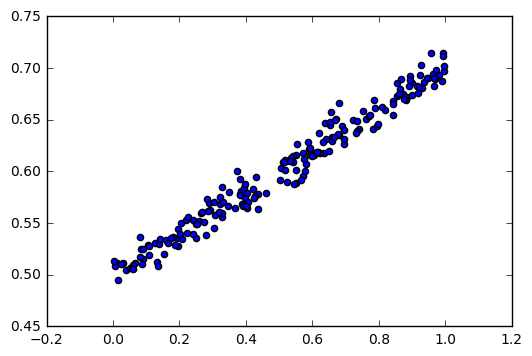

In [116]:
plt.scatter(x_data,y_data)
plt.show()

In [117]:
#随机生成的200个数据中抽选出160组数据作为训练数据，40组作为测试训练的结果的数据
x_train_data, y_train_data = x_data[:160], y_data[:160]
x_test_data, y_test_data = x_data[160:], y_data[160:]

<b>损失函数主要有下面的几种：</b>
1. mean_squared_error (MSE)

2. mean_absolute_error (MAE)

3. mean_absolute_percentage_error

4. mean_squared_logarithmic_error

5. squared_hinge

6. hinge

7. logcosh

7. categorical_crossentropy

8. sparse_categorical_crossentropy

9. binary_crossentropy

10. kullback_leibler_divergence

11. poisson

12. cosine_proximity

<b>常用的优化器</b>

1) SGD

2) RMSprop

3) Adagrad

4) Adadelta

5) Adam

6) Adamax

7) Nadam

8) TFOptimizer

#### 建立模型

In [118]:
#一层感知器实现回归
model = Sequential()
# model.add(Dense(output_dim=1,input_dim=1))
model.add(Dense(1,input_shape=(1,))) #网络层输出一维的数据流；输入为一维数据

#### 激活模型

In [ ]:
model.compile(optimizer="SGD",loss="MSE")

#### 训练模型

In [119]:
#批量训练
for step in range(5001):
    cost = model.train_on_batch(x_train_data,y_train_data) #返回scalar training loss 
    if step % 500 == 0:
        print("step",step," cost:",cost)

step 0  cost: 0.337118
step 500  cost: 0.000344906
step 1000  cost: 0.000164052
step 1500  cost: 0.000112874
step 2000  cost: 9.83924e-05
step 2500  cost: 9.42945e-05
step 3000  cost: 9.31349e-05
step 3500  cost: 9.28068e-05
step 4000  cost: 9.27139e-05
step 4500  cost: 9.26876e-05
step 5000  cost: 9.26802e-05


#### 检验模型

In [120]:
#用40组数据进行测试
cost = model.evaluate(x_test_data, y_test_data, batch_size=40) #误差
print("test cost:",cost)
w, b = model.layers[0].get_weights() #取在模型的第一层学习到的参数
print("w:",w," b:",b)

40/40 [==============================] - 0s 5ms/step
test cost: 0.000102554171463
w: [[ 0.20095931]]  b: [ 0.49976617]


#### 可视化结果

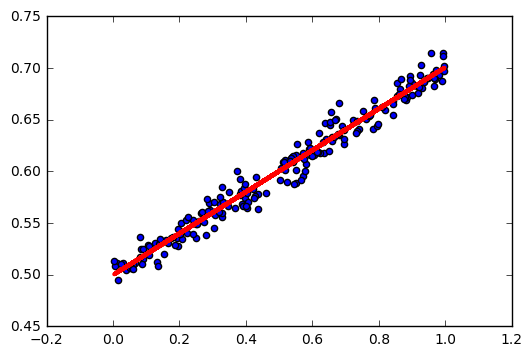

In [121]:
y_pred = model.predict(x_data)
plt.scatter(x_data,y_data) #绘制原始数据的散点图
plt.plot(x_data, y_pred, 'r-',lw=3) #绘制预测得到的拟合曲线
plt.show()

### 补充：tensorflow实现拟合

In [3]:
import tensorflow as tf
import numpy as np

# create data
# x_data = np.random.rand(100).astype(np.float32)
x_data = np.random.rand(100)
y_data = x_data*0.1 + 0.3

'''
用 tf.Variable 来创建描述 y 的参数. 
我们可以把 y_data = x_data*0.1 + 0.3 想象成 y=Weights * x + biases, 然后神经网络也就是学着把 Weights 变成 0.1, biases 变成 0.3
'''
### create tensorflow structure start ###
Weights = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
biases = tf.Variable(tf.zeros([1]))

y = Weights*x_data + biases

loss = tf.reduce_mean(tf.square(y-y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5) #学习速率0.5
train = optimizer.minimize(loss)
### create tensorflow structure end ###
#创建会话Session
sess = tf.Session()
# tf.initialize_all_variables() no long valid from 2017-03-02 if using tensorflow >= 0.12
if int((tf.__version__).split('.')[1]) < 12 and int((tf.__version__).split('.')[0]) < 1:
    init = tf.initialize_all_variables()
else:
    init = tf.global_variables_initializer()
    
#用 Session 来执行 init 初始化步骤. 并且用Session来run每一次training的数据.逐步提升神经网络的预测准确性.    
'''
Session 是 Tensorflow 为了控制和输出文件的执行的语句. 运行 session.run() 可以获得你要得知的运算结果, 或者是你所要运算的部分.
'''
sess.run(init)
for step in range(201):
    sess.run(train)
    if step % 20 == 0:
        print("step:",step," weight:",sess.run(Weights)," bias:",sess.run(biases))

step: 0  weight: [ 0.68873328]  bias: [-0.02144741]
step: 20  weight: [ 0.24066782]  bias: [ 0.22599214]
step: 40  weight: [ 0.13333708]  bias: [ 0.28246078]
step: 60  weight: [ 0.1079006]  bias: [ 0.29584336]
step: 80  weight: [ 0.10187238]  bias: [ 0.2990149]
step: 100  weight: [ 0.10044374]  bias: [ 0.29976654]
step: 120  weight: [ 0.10010514]  bias: [ 0.29994467]
step: 140  weight: [ 0.10002491]  bias: [ 0.2999869]
step: 160  weight: [ 0.1000059]  bias: [ 0.29999688]
step: 180  weight: [ 0.10000139]  bias: [ 0.29999927]
step: 200  weight: [ 0.10000033]  bias: [ 0.29999983]


### 非线性回归

In [90]:
x_data = np.linspace(-1,1,200)
noise = np.random.normal(0,0.1,x_data.shape)
y_data = np.square(x_data)+0.5+noise
# y_data = x_data**3+0.5+noise

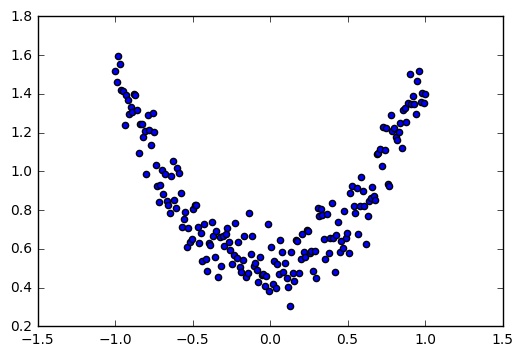

In [91]:
plt.scatter(x_data,y_data)
plt.show()

In [92]:
model = Sequential()
model.add(Dense(5,input_shape=(1,),activation='tanh')) #一层输出5维的数据流(5个神经元)；输入为一维数据
model.add(Dense(1,)) #默认把前一层的输出作为当前层的输入
model.compile(optimizer="SGD",loss="MSE")
#批量训练
for step in range(5001):
    cost = model.train_on_batch(x_data,y_data) #返回scalar training loss 
    if step % 500 == 0:
        print("step",step," cost:",cost)
w , b = model.layers[0].get_weights()
print("w:",w," b:",b)

step 0  cost: 0.858125
step 500  cost: 0.101627
step 1000  cost: 0.0830308
step 1500  cost: 0.0616301
step 2000  cost: 0.0396804
step 2500  cost: 0.024237
step 3000  cost: 0.0169094
step 3500  cost: 0.0142729
step 4000  cost: 0.0134089
step 4500  cost: 0.0130773
step 5000  cost: 0.0128925
w: [[-1.21905303  1.41336012  0.34134614  0.29206935  0.05024487]]  b: [-0.65224504 -0.75107503 -0.01228067  0.08844244 -0.80279619]


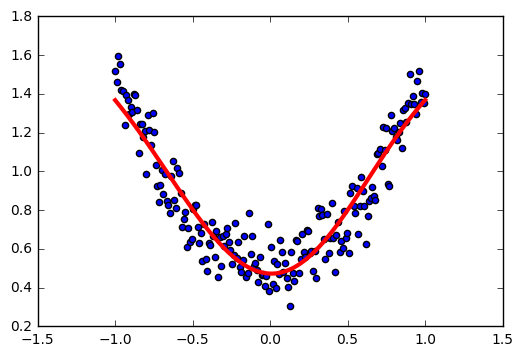

In [93]:
y_pred = model.predict(x_data)
plt.scatter(x_data,y_data) #绘制原始数据的散点图
plt.plot(x_data, y_pred, 'r-',lw=3) #绘制预测得到的拟合曲线
plt.show()

### 如何保存或加载Keras模型：
import h5py

from keras.models import load_model

model.save('my_model.h5')   # creates a HDF5 file 'my_model.h5'

del model   # deletes the existing model

model = load_model('my_model.h5')   # returns a compiled model identical to the previous one